# Installing the libraries and dependencies

In [3]:
!pip install torch torchvision torchaudio

  Using cached torch-1.13.0-cp310-cp310-win_amd64.whl (167.3 MB)
  Using cached torchvision-0.14.0-cp310-cp310-win_amd64.whl (1.1 MB)
  Using cached torchaudio-0.13.0-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached numpy-1.23.4-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)


# Cloning yoloV5 git repository

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


### Changing current directory to yoloV5 and installing the requirements listed in requirements.txt

In [4]:
!cd yolov5 & pip install -r requirements.txt

  Using cached matplotlib-3.6.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
     -------------------------------------- 151.7/151.7 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 40.1/40.1 MB 4.7 MB/s eta 0:00:00
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
     ---------------------------------------- 6.0/6.0 MB 5.4 MB/s eta 0:00:00
  Using cached pandas-1.5.1-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached contourpy-1.0.6-cp310-cp310-win_amd64.whl (163 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached grpcio-1.50.0-cp310-cp310-win_amd64.whl (3.6 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached te

# Import libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm.notebook import tqdm

C:\Users\DELL\.conda\envs\helmet-detection-wobot\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the model

In [2]:
"""
This loads the pre-trained model from torch-hub
and we will be using the base-line model
"""

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-12 Python-3.10.6 torch-1.13.0+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:06<00:00, 2.15MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
img = "https://ultralytics.com/images/zidane.jpg"

##### Testing yolo model on an image

In [4]:
results = model(img)
results.print()

image 1/1: 720x1280 2 helmets
Speed: 547.4ms pre-process, 75.8ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


[ 878   34 1081  296    0    0]


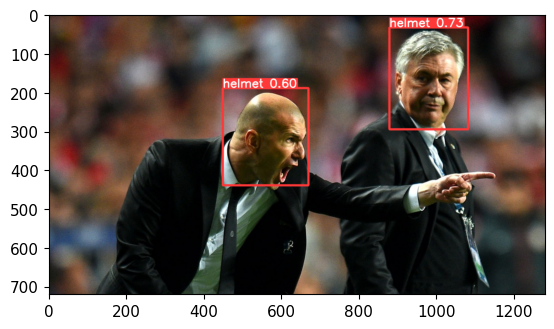

In [5]:
%matplotlib inline
img = np.squeeze(results.render())
plt.imshow(np.squeeze(results.render()))
bbox = np.array(np.int64(results.xyxy[0][0]))
print(bbox)

# Real-time detection

In [31]:
cap = cv2.VideoCapture(0)

# the while condition checks whether the cam is open or not
while cap.isOpened():
    
    """
        ret gets a boolean value of True or False
        when the last frame is processed it return a False value
    """
    ret, frame = cap.read()
    
    
    # making detections
    results = model(frame)

  
    """
    np.squeeze() is used to remove single-dimensional entries from an array's shape
    If shape of result is (1,x, y, z), np.squeeze() will convert the shape to (x, y, z)
    """
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Training the model

In [12]:
%cd yolov5
!python train.py --img 416 --batch 16 --epochs 3 --data dataset.yaml --weights yolov5s.pt

E:\wobot\yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-239-gf33718f Python-3.10.6 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, 

## Changing the path to root directory because the path provided is in reference with the root directory 

In [14]:
%cd ..

E:\wobot


## Loading the custom trained model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = './yolov5/runs/train/exp/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2022-11-13 Python-3.10.6 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Testing the image on a test sample

In [18]:
import os
image_path = os.path.join('.\data\HardHat_Test_Images\Images', 'hard_hat_workers210.png')

image 1/1: 415x416 10 helmets
Speed: 10.5ms pre-process, 139.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


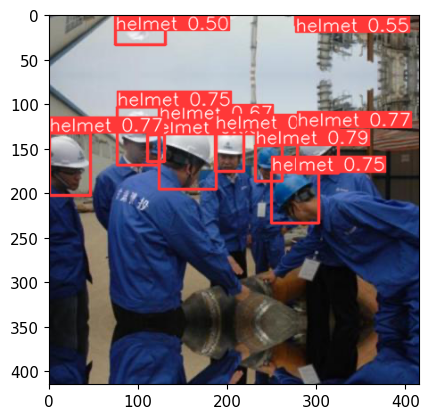

In [32]:
%matplotlib inline

results = model(image_path)
results.print()

img = np.squeeze(results.render())
plt.imshow(img)



# Getting the bounding box area

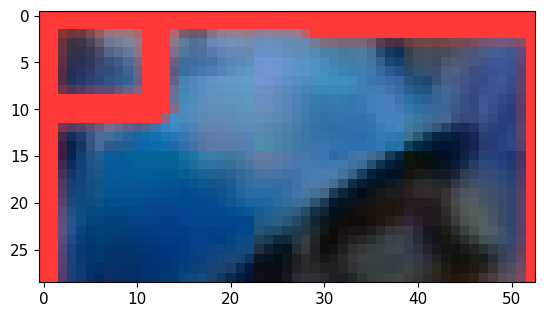

In [35]:
def bounding_box_img(img,bbox):
    x_min, y_min, x_max, y_max = bbox 
    
    y_max = y_max - (y_max - y_min) // 2
    bbox_obj = img[y_min:y_max, x_min:x_max]
    return bbox_obj

cropped_img = bounding_box_img(img,bbox[:4])
plt.imshow(cropped_img)


### testing on test smaple for ROI

[249 177 302 234   0   0]


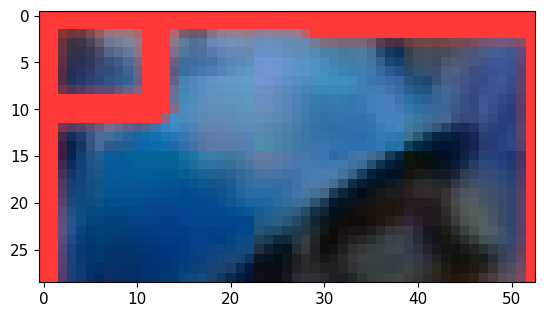

In [36]:
bbox = np.array(np.int64(results.xyxy[0][5]))
print(bbox)

cropped_img = bounding_box_img(img,bbox[:4])
plt.imshow(cropped_img)

In [37]:
def unique_count_app(a):
    '''
    a: NumPy array i.e. the ROI from your image
    Returns: tuple (r, g, b)
    '''
    colors, count = np.unique(
        a.reshape(-1, a.shape[-1]), axis=0, return_counts=True)
    return colors[count.argmax()]



def closest(color):
    '''
    Parameter:
    colour: tuple (r, g, b)
    Returns:
    a list, which has [r, g, b] value for closest color from the passed `color` and name of colour
    '''
    color_map = {0: "blue",
                 1: "yellow",
                 2: "orange",
                 3: "white"}
    
    colors = np.array([[0, 128, 255], 
                       [232, 215, 0], 
                       [255, 145, 0], 
                       [255, 255, 255]])
    color = np.array(color)
    distances = np.sqrt(np.sum((colors-color)**2, axis=1))
    index_of_smallest = np.where(distances == np.amin(distances))
    idx = index_of_smallest[0][0]
    return colors[idx], color_map[idx]

color_tuple = unique_count_app(cropped_img)
print(color_tuple)
closest(color_tuple)

[255  56  56]


(array([255, 145,   0]), 'orange')

### Testing the model on youtube video

In [45]:
cap = cv2.VideoCapture("sample.mp4")
# winname = "aaaaa"


# the while condition checks whether the cam is open or not
while cap.isOpened():
    ret, frame = cap.read()
#     frame = frame[120:120+250, 200:200+250,:]
    
    
    # making detections
    results = model(frame)

    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

#### Increased frame-rate and reshaped the player

In [1]:
import numpy as np
import cv2
import time
 
 
# creating the videocapture object
# and reading from the input file
# Change it to 0 if reading from webcam
 
cap = cv2.VideoCapture('sample.mp4')
 
# used to record the time when we processed last frame
prev_frame_time = 0
 
# used to record the time at which we processed current frame
new_frame_time = 0
 
# Reading the video file until finished
while(cap.isOpened()):
 
    # Capture frame-by-frame
 
    ret, frame = cap.read()
 
    # if video finished or no Video Input
    if not ret:
        break
 
    # Our operations on the frame come here
    gray = frame
 
    # resizing the frame size according to our need
    gray = cv2.resize(gray, (416, 416))
 
    # font which we will be using to display FPS
    font = cv2.FONT_HERSHEY_SIMPLEX
    # time when we finish processing for this frame
    new_frame_time = time.time()
 
    # Calculating the fps
 
    # fps will be number of frame processed in given time frame
    # since their will be most of time error of 0.001 second
    # we will be subtracting it to get more accurate result
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
 
    # converting the fps into integer
    fps = int(fps)
 
    # converting the fps to string so that we can display it on frame
    # by using putText function
    fps = str(fps)
 
    # putting the FPS count on the frame
    cv2.putText(gray, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
 
    # displaying the frame with fps
    
    # making detections
    results = model(gray)

    
    cv2.imshow('YOLO', np.squeeze(results.render()))
#     cv2.imshow('frame', gray)0
 
    # press 'Q' if you want to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
# Destroy the all windows now
cv2.destroyAllWindows()

NameError: name 'model' is not defined